In [1]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import paths
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from matplotlib.lines import Line2D
# plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
expfolder = (paths.results / "old_results") / "cust_kmeans_dist-correlation_ttype-percentage_tvalue-15_k-4_ninits-50_activation-pos_n-481"
metrics_df_path = expfolder / paths.metrics_per_subject_df_name
metrics_df = pd.read_pickle(metrics_df_path)
metrics_df

TPM  \
                                                                               0   
subj_name                                                                          
(sub-CC00060XX03, ses-12501)   [[0.7335080821319353, 0.04892966360856269, 0.0...   
(sub-CC00063AN06, ses-15102)   [[0.7265181301878549, 0.03407601572739188, 0.0...   
(sub-CC00064XX07, ses-18303)   [[0.7304499781564002, 0.05329838357361293, 0.0...   
(sub-CC00067XX10, ses-20200)   [[0.7584097859327217, 0.03232852774137178, 0.0...   
(sub-CC00068XX11, ses-20701)   [[0.7605941459152469, 0.027959807776321538, 0....   
...                                                                          ...   
(sub-CC01223XX11, ses-149330)  [[0.743993010048056, 0.03058103975535168, 0.03...   
(sub-CC01229XX17, ses-155630)  [[0.7575360419397117, 0.023154215814766274, 0....   
(sub-CC01232AN12, ses-152530)  [[0.7680209698558322, 0.02708606378331149, 0.0...   
(sub-CC01232BN12, ses-152130)  [[0.7575360419397117, 0.027522935779816515, 0....   
(sub-CC01236XX16, ses-155830)  [[0.744866754041066, 0.03145478374836173, 0.03...   

                                       nxGraph CAPEntriesFromBaseline  \
                                             0                      0   
subj_name                                                               
(sub-CC00060XX03, ses-12501)   (0, 1, 2, 3, 4)               0.733508   
(sub-CC00063AN06, ses-15102)   (0, 1, 2, 3, 4)               0.726518   
(sub-CC00064XX07, ses-18303)   (0, 1, 2, 3, 4)               0.730450   
(sub-CC00067XX10, ses-20200)   (0, 1, 2, 3, 4)               0.758410   
(sub-CC00068XX11, ses-20701)   (0, 1, 2, 3, 4)               0.760594   
...                                        ...                    ...   
(sub-CC01223XX11, ses-149330)  (0, 1, 2, 3, 4)               0.743993   
(sub-CC01229XX17, ses-155630)  (0, 1, 2, 3, 4)               0.757536   
(sub-CC01232AN12, ses-152530)  (0, 1, 2, 3, 4)               0.768021   
(sub-CC01232BN12, ses-152130)  (0, 1, 2, 3, 4)               0.757536   
(sub-CC01236XX16, ses-155830)  (0, 1, 2, 3, 4)               0.744867   

                                                                       \
                                      1         2         3         4   
subj_name                                                               
(sub-CC00060XX03, ses-12501)   0.048930  0.026649  0.012232  0.028834   
(sub-CC00063AN06, ses-15102)   0.034076  0.043687  0.018349  0.027523   
(sub-CC00064XX07, ses-18303)   0.053298  0.032765  0.018349  0.015291   
(sub-CC00067XX10, ses-20200)   0.032329  0.025339  0.019659  0.014417   
(sub-CC00068XX11, ses-20701)   0.027960  0.024028  0.015727  0.021844   
...                                 ...       ...       ...       ...   
(sub-CC01223XX11, ses-149330)  0.030581  0.038008  0.020970  0.016601   
(sub-CC01229XX17, ses-155630)  0.023154  0.017475  0.035824  0.016164   
(sub-CC01232AN12, ses-152530)  0.027086  0.017038  0.024465  0.013980   
(sub-CC01232BN12, ses-152130)  0.027523  0.027960  0.030144  0.006990   
(sub-CC01236XX16, ses-155830)  0.031455  0.032765  0.016164  0.024902   

                              CAPExitsToBaseline                      ...  \
                                               0         1         2  ...   
subj_name                                                             ...   
(sub-CC00060XX03, ses-12501)            0.733508  0.048930  0.027960  ...   
(sub-CC00063AN06, ses-15102)            0.726518  0.032329  0.042377  ...   
(sub-CC00064XX07, ses-18303)            0.730450  0.053735  0.034950  ...   
(sub-CC00067XX10, ses-20200)            0.758410  0.034076  0.026212  ...   
(sub-CC00068XX11, ses-20701)            0.760594  0.028834  0.026212  ...   
...                                          ...       ...       ...  ...   
(sub-CC01223XX11, ses-149330)           0.743993  0.030581  0.039318  ...   
(sub-CC01229XX17, ses-155630)           0.757536  0.024465  0.016164  ...   
(sub-CC

In [3]:
subjs_infos = paths.bids_root / "combined.tsv"
subjs_infos = pd.read_csv(subjs_infos, sep="\t")
subjs_infos

,participant_id,session_id,scan_number,singleton,sedation,birth_age,scan_age,sex,birth_weight,head_circumference_scan,...,qc_fmri_fieldmap_type,qc_fmri_dvars_z,qc_fmri_tsnr_z,qc_fmri_mcdc2sbref_z,qc_fmri_sbref2struct_z,qc_fmri_fmap2struct_z,qc_fmri_standard2struct_z,qc_fmri_flagged,qc_fmri_comment,qc_smri_pipeline_status
0,CC00050XX01,7201,1,S,False,43.000000,43.29,female,3.910,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
1,CC00051XX02,7702,1,S,False,39.857143,40.00,female,3.310,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
2,CC00052XX03,8300,1,S,False,38.000000,38.71,female,2.640,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
3,CC00053XX04,8607,1,S,False,40.000000,40.43,female,3.460,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
4,CC00054XX05,8800,1,S,False,41.857143,42.14,male,3.690,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,CC01232BN12,152130,1,M,False,35.000000,35.43,female,2.140,30.1,...,spin_echo_epi,1.149254,0.655733,1.852760,1.716708,0.556462,0.778163,False,NaN,full
883,CC01234AN14,155030,1,M,False,32.857143,33.29,female,2.280,30.5,...,dual_echo_time,-0.446718,-0.591990,1.563579,1.603737,2.113433,4.689710,False,corrupted spinecho,full
884,CC01234BN14,155230,1,M,False,32.857143,33.43,female,2.150,31.0,...,spin_echo_epi,0.223027,-0.246356,2.395129,1.663545,2.136479,4.685564,False,NaN,full
885,CC01236XX16,155830,1,S,False,40.714286,44.43,female,3.675,36.5,...,spin_echo_epi,-0.274686,0.576533,-0.094599,0.511690,0.281604,-1.325503,False,NaN,full


In [4]:
# add sub- prefix to participand_id column
subjs_infos['subj_name'] = subjs_infos['participant_id'].apply(lambda x: f"sub-{x}")
subjs_infos['ses_name'] = subjs_infos['session_id'].apply(lambda x: f"ses-{x}")
columns_to_keep = [
    'subj_name',
    'ses_name',
    'sedation',
    'birth_age',
    'scan_age',
    'sex',
]
# drop non wanted columns
subjs_infos = subjs_infos[columns_to_keep]

# check that all subjs from metrics_df are in subjs_infos
fullgroup_subjs = metrics_df.index.get_level_values('subj_name').unique()
cohort_subjs = list(subjs_infos[['subj_name', 'ses_name']].drop_duplicates().itertuples(index=False, name=None))

assert set(fullgroup_subjs).issubset(set(cohort_subjs))

In [5]:
# get subj_info_df, a df containing only rows where subj_name, ses_name is in fullgroup_subj
subjs_infos_df = (
    subjs_infos
    .set_index(["subj_name", "ses_name"])
    .loc[fullgroup_subjs]
)
subjs_infos_df.index = list(map(tuple, subjs_infos_df.index))
subjs_infos_df

,sedation,birth_age,scan_age,sex
"(sub-CC00060XX03, ses-12501)",False,40.142857,40.29,female
"(sub-CC00063AN06, ses-15102)",False,35.142857,35.71,female
"(sub-CC00064XX07, ses-18303)",False,38.571429,38.86,male
"(sub-CC00067XX10, ses-20200)",False,40.000000,40.14,male
"(sub-CC00068XX11, ses-20701)",False,40.428571,40.71,female
...,...,...,...,...
"(sub-CC01223XX11, ses-149330)",False,38.714286,40.86,female
"(sub-CC01229XX17, ses-155630)",False,34.857143,35.86,male
"(sub-CC01232AN12, ses-152530)",False,35.000000,35.57,male
"(sub-CC01232BN12, ses-152130)",False,35.000000,35.43,female


In [6]:
# make each column of subjs_infos_df a multiindex with first level the column name, second level 0
subjs_infos_df.columns = pd.MultiIndex.from_tuples([(col, 0) for col in subjs_infos_df.columns])
subjs_infos_df

,sedation,birth_age,scan_age,sex
,0,0,0,0
"(sub-CC00060XX03, ses-12501)",False,40.142857,40.29,female
"(sub-CC00063AN06, ses-15102)",False,35.142857,35.71,female
"(sub-CC00064XX07, ses-18303)",False,38.571429,38.86,male
"(sub-CC00067XX10, ses-20200)",False,40.000000,40.14,male
"(sub-CC00068XX11, ses-20701)",False,40.428571,40.71,female
...,...,...,...,...
"(sub-CC01223XX11, ses-149330)",False,38.714286,40.86,female
"(sub-CC01229XX17, ses-155630)",False,34.857143,35.86,male
"(sub-CC01232AN12, ses-152530)",False,35.000000,35.57,male


In [7]:
# join metrics_df with subjs_infos_df, raise error if index are not the same
metrics_metadata_df = pd.concat([metrics_df, subjs_infos_df], axis=1, join='inner', ignore_index=False, keys=['metrics', 'metadata'], verify_integrity=True)
metrics_metadata_df

metrics  \
                                                                             TPM   
                                                                               0   
(sub-CC00060XX03, ses-12501)   [[0.7335080821319353, 0.04892966360856269, 0.0...   
(sub-CC00063AN06, ses-15102)   [[0.7265181301878549, 0.03407601572739188, 0.0...   
(sub-CC00064XX07, ses-18303)   [[0.7304499781564002, 0.05329838357361293, 0.0...   
(sub-CC00067XX10, ses-20200)   [[0.7584097859327217, 0.03232852774137178, 0.0...   
(sub-CC00068XX11, ses-20701)   [[0.7605941459152469, 0.027959807776321538, 0....   
...                                                                          ...   
(sub-CC01223XX11, ses-149330)  [[0.743993010048056, 0.03058103975535168, 0.03...   
(sub-CC01229XX17, ses-155630)  [[0.7575360419397117, 0.023154215814766274, 0....   
(sub-CC01232AN12, ses-152530)  [[0.7680209698558322, 0.02708606378331149, 0.0...   
(sub-CC01232BN12, ses-152130)  [[0.7575360419397117, 0.027522935779816515, 0....   
(sub-CC01236XX16, ses-155830)  [[0.744866754041066, 0.03145478374836173, 0.03...   

                                                                       \
                                       nxGraph CAPEntriesFromBaseline   
                                             0                      0   
(sub-CC00060XX03, ses-12501)   (0, 1, 2, 3, 4)               0.733508   
(sub-CC00063AN06, ses-15102)   (0, 1, 2, 3, 4)               0.726518   
(sub-CC00064XX07, ses-18303)   (0, 1, 2, 3, 4)               0.730450   
(sub-CC00067XX10, ses-20200)   (0, 1, 2, 3, 4)               0.758410   
(sub-CC00068XX11, ses-20701)   (0, 1, 2, 3, 4)               0.760594   
...                                        ...                    ...   
(sub-CC01223XX11, ses-149330)  (0, 1, 2, 3, 4)               0.743993   
(sub-CC01229XX17, ses-155630)  (0, 1, 2, 3, 4)               0.757536   
(sub-CC01232AN12, ses-152530)  (0, 1, 2, 3, 4)               0.768021   
(sub-CC01232BN12, ses-152130)  (0, 1, 2, 3, 4)               0.757536   
(sub-CC01236XX16, ses-155830)  (0, 1, 2, 3, 4)               0.744867   

                                                                       \
                                                                        
                                      1         2         3         4   
(sub-CC00060XX03, ses-12501)   0.048930  0.026649  0.012232  0.028834   
(sub-CC00063AN06, ses-15102)   0.034076  0.043687  0.018349  0.027523   
(sub-CC00064XX07, ses-18303)   0.053298  0.032765  0.018349  0.015291   
(sub-CC00067XX10, ses-20200)   0.032329  0.025339  0.019659  0.014417   
(sub-CC00068XX11, ses-20701)   0.027960  0.024028  0.015727  0.021844   
...                                 ...       ...       ...       ...   
(sub-CC01223XX11, ses-149330)  0.030581  0.038008  0.020970  0.016601   
(sub-CC01229XX17, ses-155630)  0.023154  0.017475  0.035824  0.016164   
(sub-CC01232AN12, ses-152530)  0.027086  0.017038  0.024465  0.013980   
(sub-CC01232BN12, ses-152130)  0.027523  0.027960  0.030144  0.006990   
(sub-CC01236XX16, ses-155830)  0.031455  0.032765  0.016164  0.024902   

                                                                      ...  \
                              CAPExitsToBaseline                      ...   
                                               0         1         2  ...   
(sub-CC00060XX03, ses-12501)            0.733508  0.048930  0.027960  ...   
(sub-CC00063AN06, ses-15102)            0.726518  0.032329  0.042377  ...   
(sub-CC00064XX07, ses-18303)            0.730450  0.053735  0.034950  ...   
(sub-CC00067XX10, ses-20200)            0.758410  0.034076  0.026212  ...   
(sub-CC00068XX11, ses-20701)            0.760594  0.028834  0.026212  ...   
...                                          ...       ...       ...  ...   
(sub-CC01223XX11, ses-149330)           0.743993  0.030581  0.039318  ...   
(sub-CC01229XX17, ses-155630)           0.757536  0.024465  0.016164  ...   
(su

In [8]:
metrics_to_plot = [
        "CAPEntriesFromBaseline",
        "CAPExitsToBaseline",
        "CAPResilience" ,
        "CAPInDegree",
        "CAPOutDegree",
        "frameCountsPerCAP",
        "n_seq_per_state",
        "avg_state_len",
    ]
states = metrics_metadata_df[("metrics", "nxGraph", 0)].iloc[0].nodes()

/tmp/ipykernel_4245/1446892512.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  metric_df = metrics_metadata_df[("metrics", metric)]


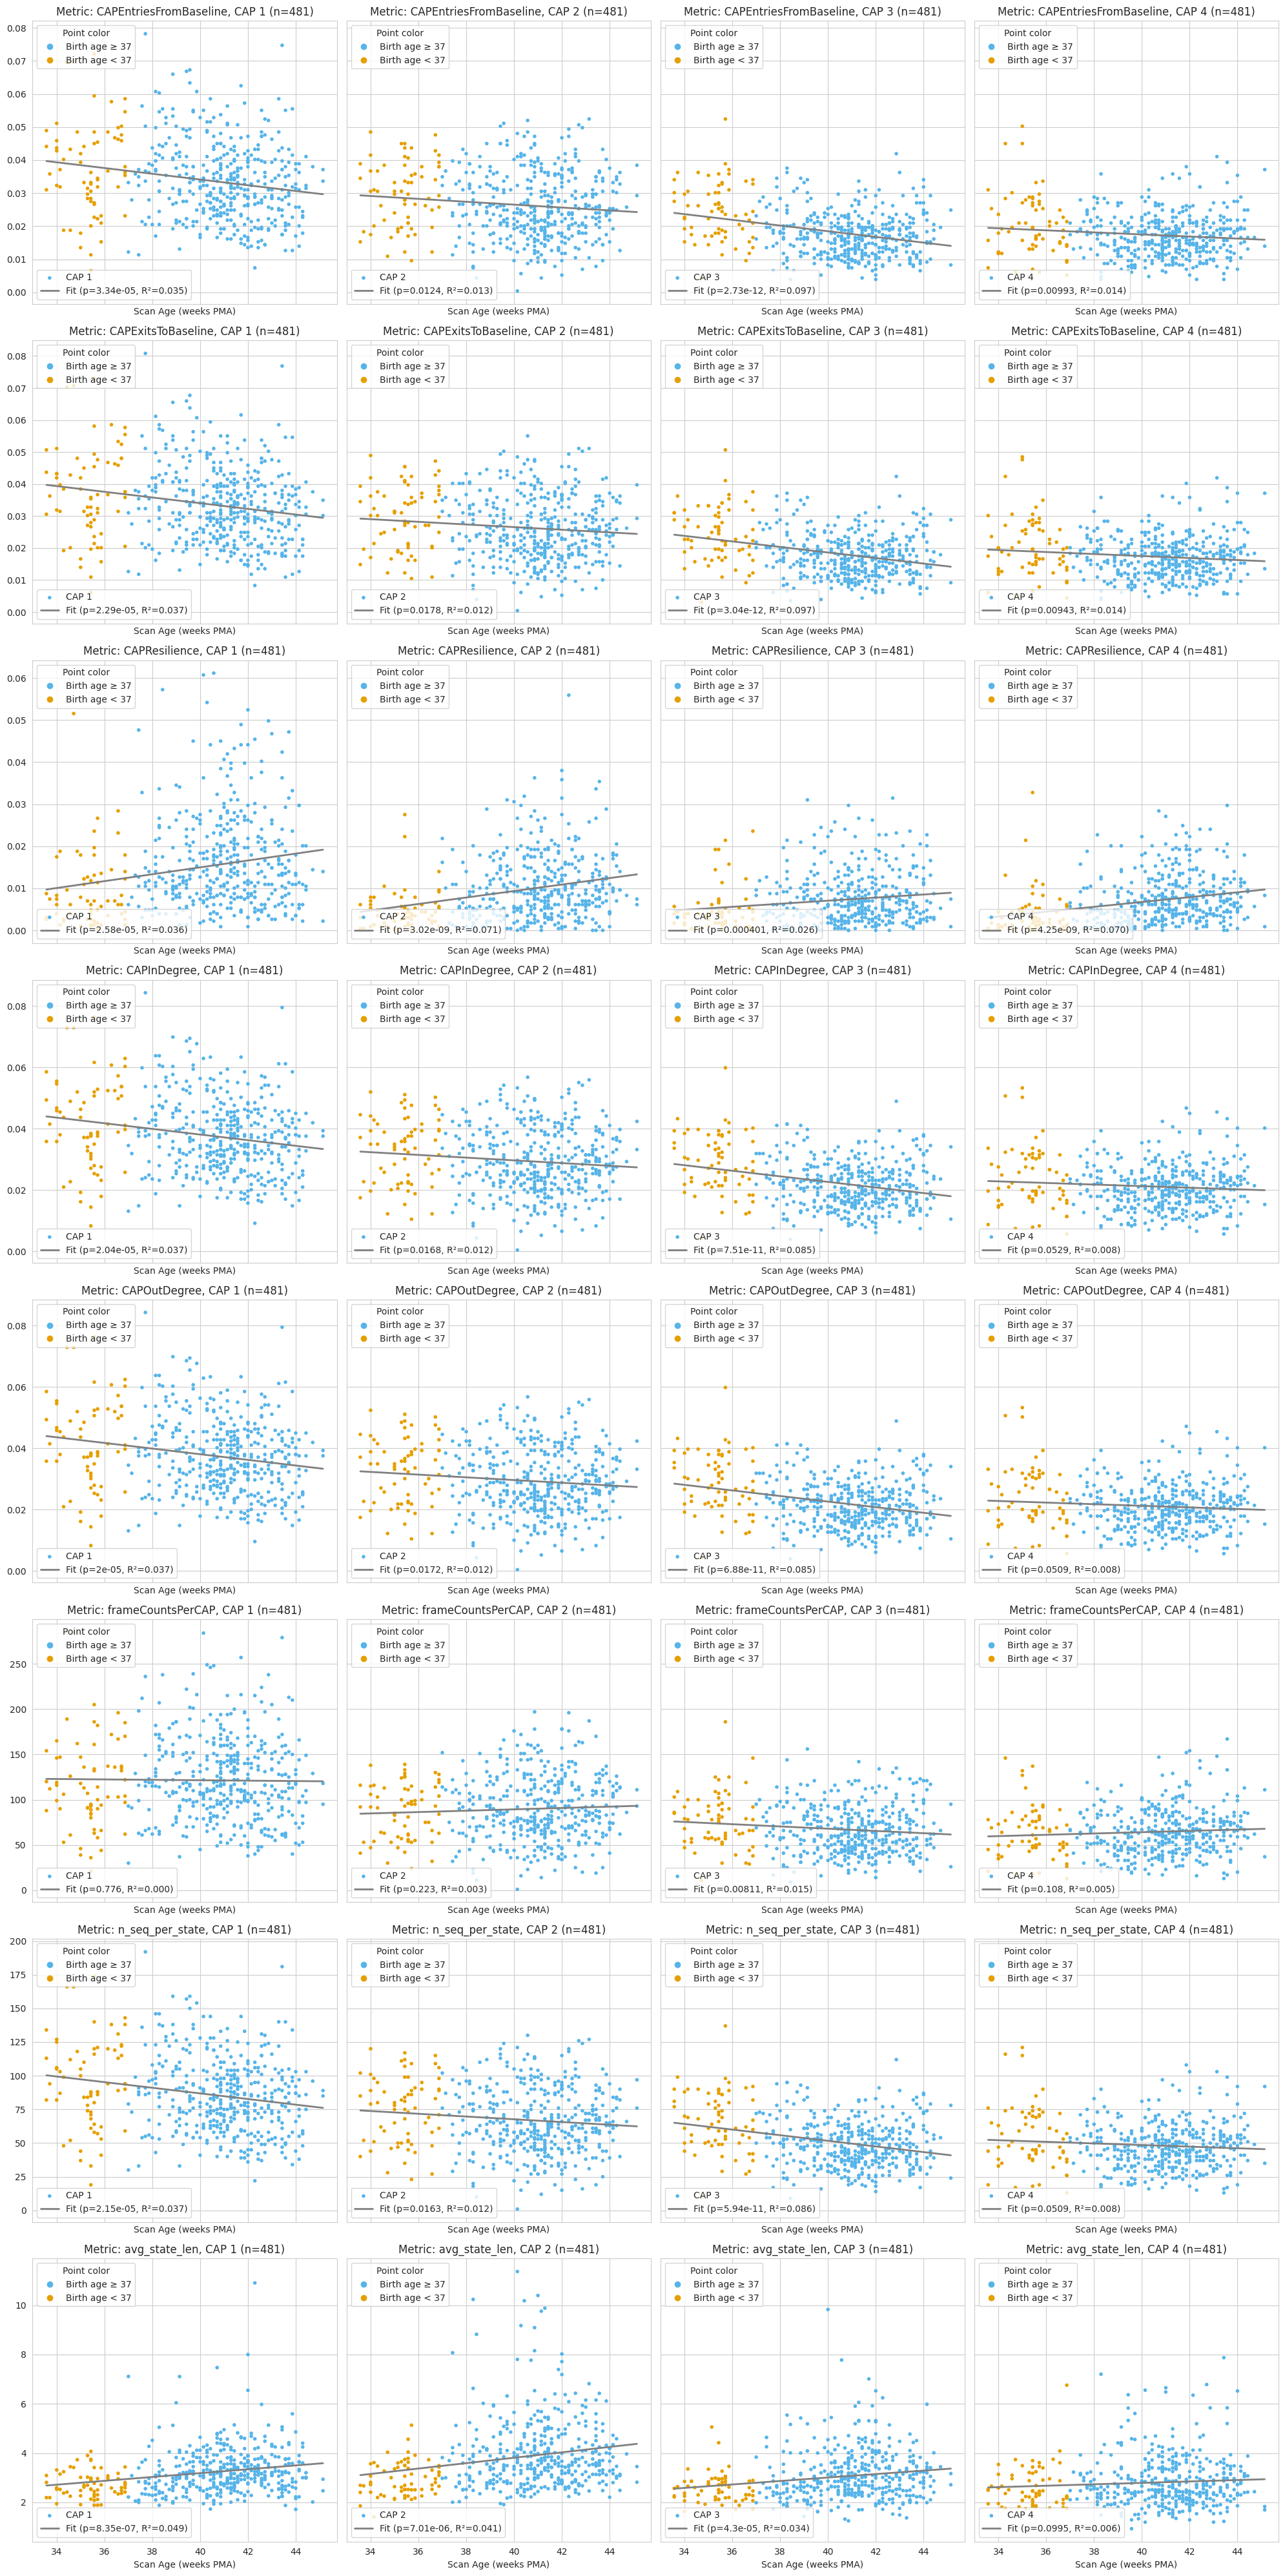

In [9]:
from scipy.stats import linregress
n_metrics = len(metrics_to_plot)
n_states = len(states)
# compute optimal n cols and rows for subplots
n_cols = n_states - 1
n_rows = n_metrics

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows), sharey="row", sharex=True)
x = metrics_metadata_df[("metadata", "scan_age", 0)]
is_preterm = metrics_metadata_df[("metadata", "scan_age", 0)] < 37
n = len(x)

for metric_idx, metric in enumerate(metrics_to_plot):
    metric_df = metrics_metadata_df[("metrics", metric)]
    for cap_id in metric_df.columns:
        if cap_id == 0: continue
        ax = axes[metric_idx, cap_id - 1]
        y = metric_df[cap_id]
        slope, intercept, r_value, p_value, std_err = linregress(x, y)

        colors = np.where(is_preterm, '#E69F00', '#56B4E9')  # orange vs blue-green
        ax.scatter(x, y, c=colors, marker='.', label=f"CAP {cap_id}")

        xs = np.array([x.min(), x.max()])
        ax.plot(xs, slope*xs + intercept, color='gray' ,linewidth=2, label=f"Fit (p={p_value:.3g}, R²={r_value**2:.3f})")

        legend_elements = [
            Line2D([0], [0], color='#56B4E9', marker='o', linestyle='', label='Birth age ≥ 37'),
            Line2D([0], [0], color='#E69F00', marker='o', linestyle='', label='Birth age < 37'),
        ]
        leg1 = ax.legend(handles=legend_elements, loc='upper left', title="Point color")
        ax.add_artist(leg1)
        ax.legend(loc='lower left')
        ax.set_title(f"Metric: {metric}, CAP {cap_id} ({n=})")
        ax.set_xlabel("Scan Age (weeks PMA)")
plt.tight_layout()
plt.show()

0.00010263313015607069
3.178902261471319e-05
3.8146827137654895e-05
2.1798186935803412e-05
2.5431218091770084e-05


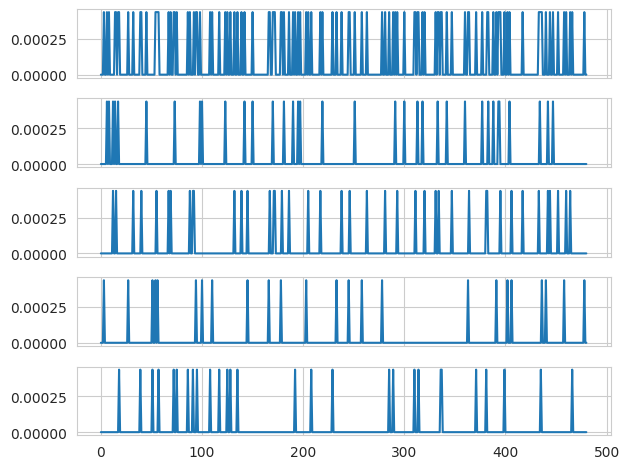

In [10]:
fig, axes = plt.subplots(nrows=n_states, sharex=True)
for cap_id in range(n_states):
    diffs = np.abs((metrics_metadata_df[("metrics", "CAPInDegree", cap_id)]
        - metrics_metadata_df[("metrics", "CAPOutDegree", cap_id)]).values)
    axes[cap_id].plot(diffs)
    print(diffs.mean())
plt.tight_layout()
plt.show()

In [11]:
metrics_metadata_df[("metadata", "rounded_scan_age", 0)] =  metrics_metadata_df[("metadata", "scan_age", 0)].round()
age_groups = metrics_metadata_df.groupby(metrics_metadata_df["metadata", "rounded_scan_age", 0])
age_groups.size()

(metadata, rounded_scan_age, 0)
34.0     14
35.0     22
36.0     19
37.0     20
38.0     33
39.0     44
40.0     55
41.0    101
42.0     73
43.0     57
44.0     40
45.0      3
dtype: int64

In [12]:
# subplots: each row correspond to a cap (5 rows) and each column to a metric. each plot is has for each age group the mean value of its metric with error bars as std
aggregated_data = defaultdict(lambda: defaultdict(dict))
# structure : aggregated_data[metric][cap_id] = {age_group_name: [list of subject values]}
for age_group_name, age_group_df in age_groups:
    print(f"Age group: {age_group_name}, n subjects: {len(age_group_df)}")
    for metric in metrics_to_plot:
        metric_df = age_group_df[("metrics", metric)]
        for cap_id in metric_df.columns:
            aggregated_data[metric][cap_id][age_group_name] = metric_df[cap_id].values

Age group: 34.0, n subjects: 14
Age group: 35.0, n subjects: 22
Age group: 36.0, n subjects: 19
Age group: 37.0, n subjects: 20
Age group: 38.0, n subjects: 33
Age group: 39.0, n subjects: 44
Age group: 40.0, n subjects: 55
Age group: 41.0, n subjects: 101
Age group: 42.0, n subjects: 73
Age group: 43.0, n subjects: 57
Age group: 44.0, n subjects: 40
Age group: 45.0, n subjects: 3


/tmp/ipykernel_4245/1054741367.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  metric_df = age_group_df[("metrics", metric)]


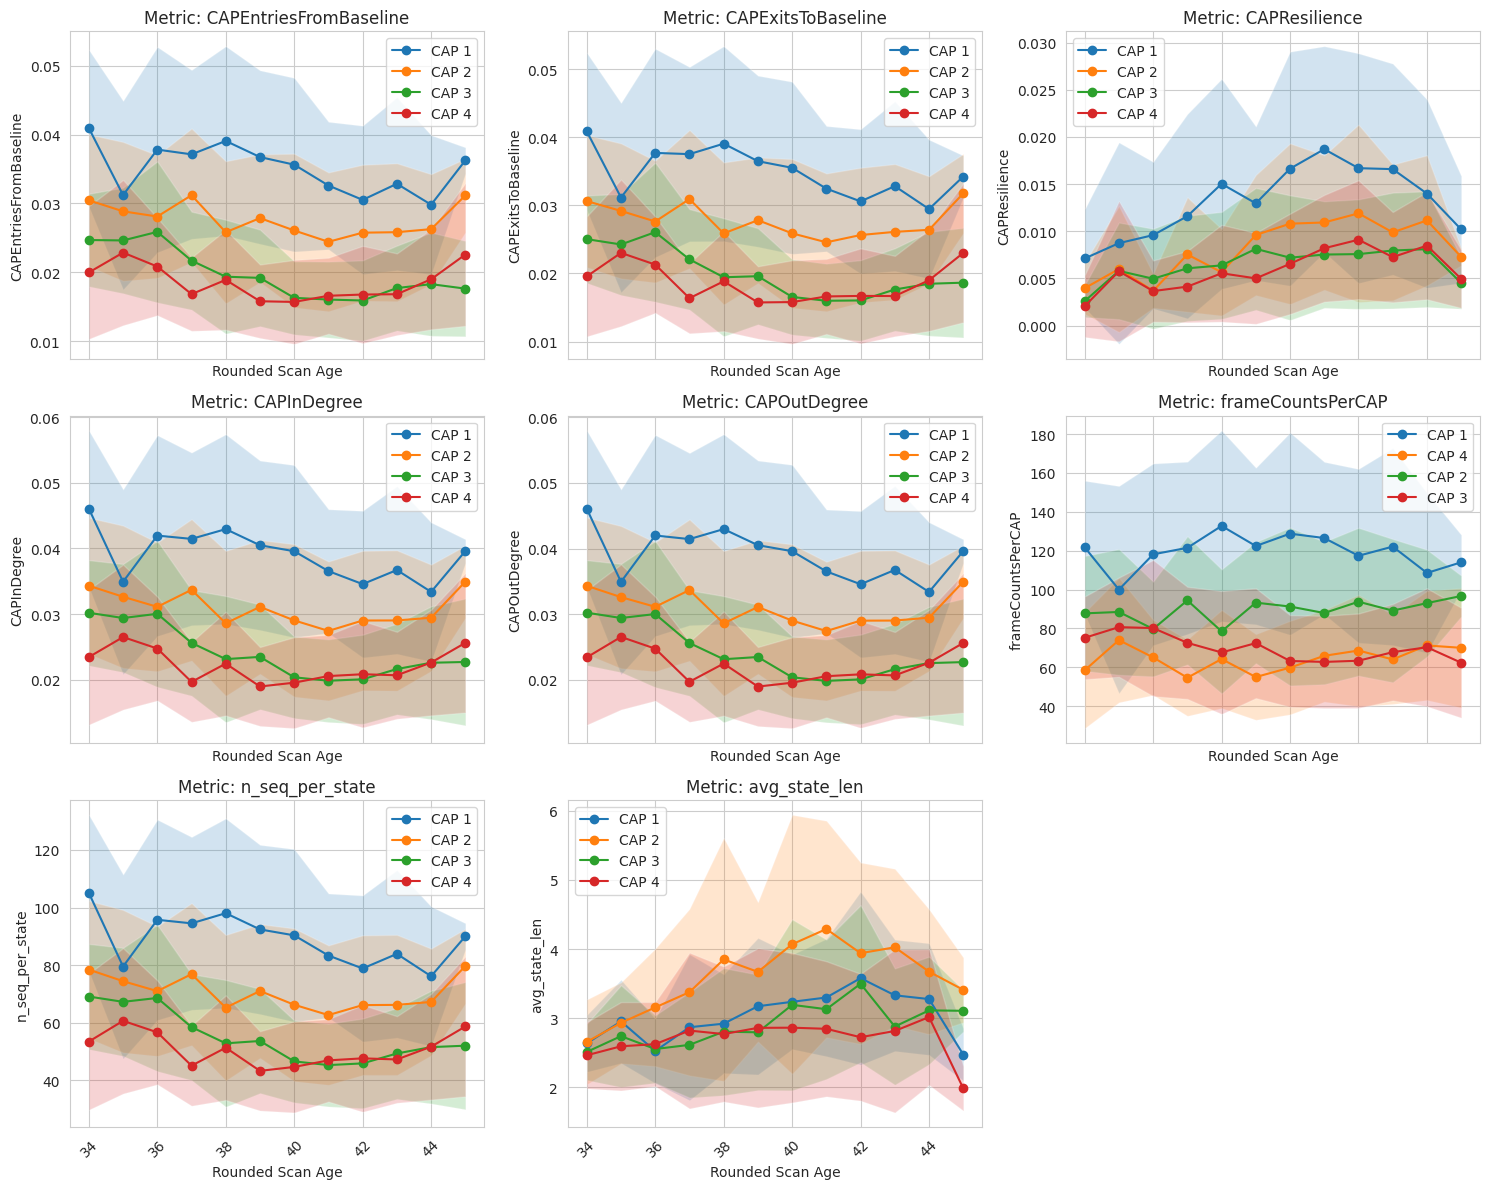

In [13]:
# I want to plot for each CAP the evolution across age groups of its metrics. 7
# each metrics needs a separate plot as the scales are different
# add a line per cap in each plot instead of a plot per cap
n_metrics = len(aggregated_data.keys())

# compute optimal n cols and rows for subplots
n_cols = int(np.ceil(np.sqrt(n_metrics)))
n_rows = int(np.ceil(n_metrics / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), sharex=True)
axes = axes.flatten()

# hide unused axes
for ax in axes[n_metrics:]:
    ax.axis('off')


for row_idx, metric in enumerate(aggregated_data.keys()):
    ax = axes[row_idx]
    age_group_names = sorted(next(iter(aggregated_data[metric].values())).keys())
    for cap_id in aggregated_data[metric].keys():
        means = [np.mean(aggregated_data[metric][cap_id][age_group]) for age_group in age_group_names]
        stds = [np.std(aggregated_data[metric][cap_id][age_group]) for age_group in age_group_names]

        if cap_id == 0:
            # Plot baseline on secondary y-axis
            # ax2 = ax.twinx()
            # ax2.plot(age_group_names, means, marker='s', linestyle='--', color='gray', label="Baseline (CAP 0)")
            # ax2.fill_between(age_group_names,
            #                  np.array(means) - np.array(stds),
            #                  np.array(means) + np.array(stds),
            #                  color='gray', alpha=0.1)
            # ax2.set_ylabel(f"{metric} (Baseline)", color='gray')
            continue

        ax.plot(age_group_names, means, marker='o', label=f"CAP {cap_id}")
        ax.fill_between(age_group_names,
                        np.array(means) - np.array(stds),
                        np.array(means) + np.array(stds),
                        alpha=0.2)
    ax.set_title(f"Metric: {metric}")
    ax.set_xlabel("Rounded Scan Age")
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
plt.tight_layout()
plt.show()

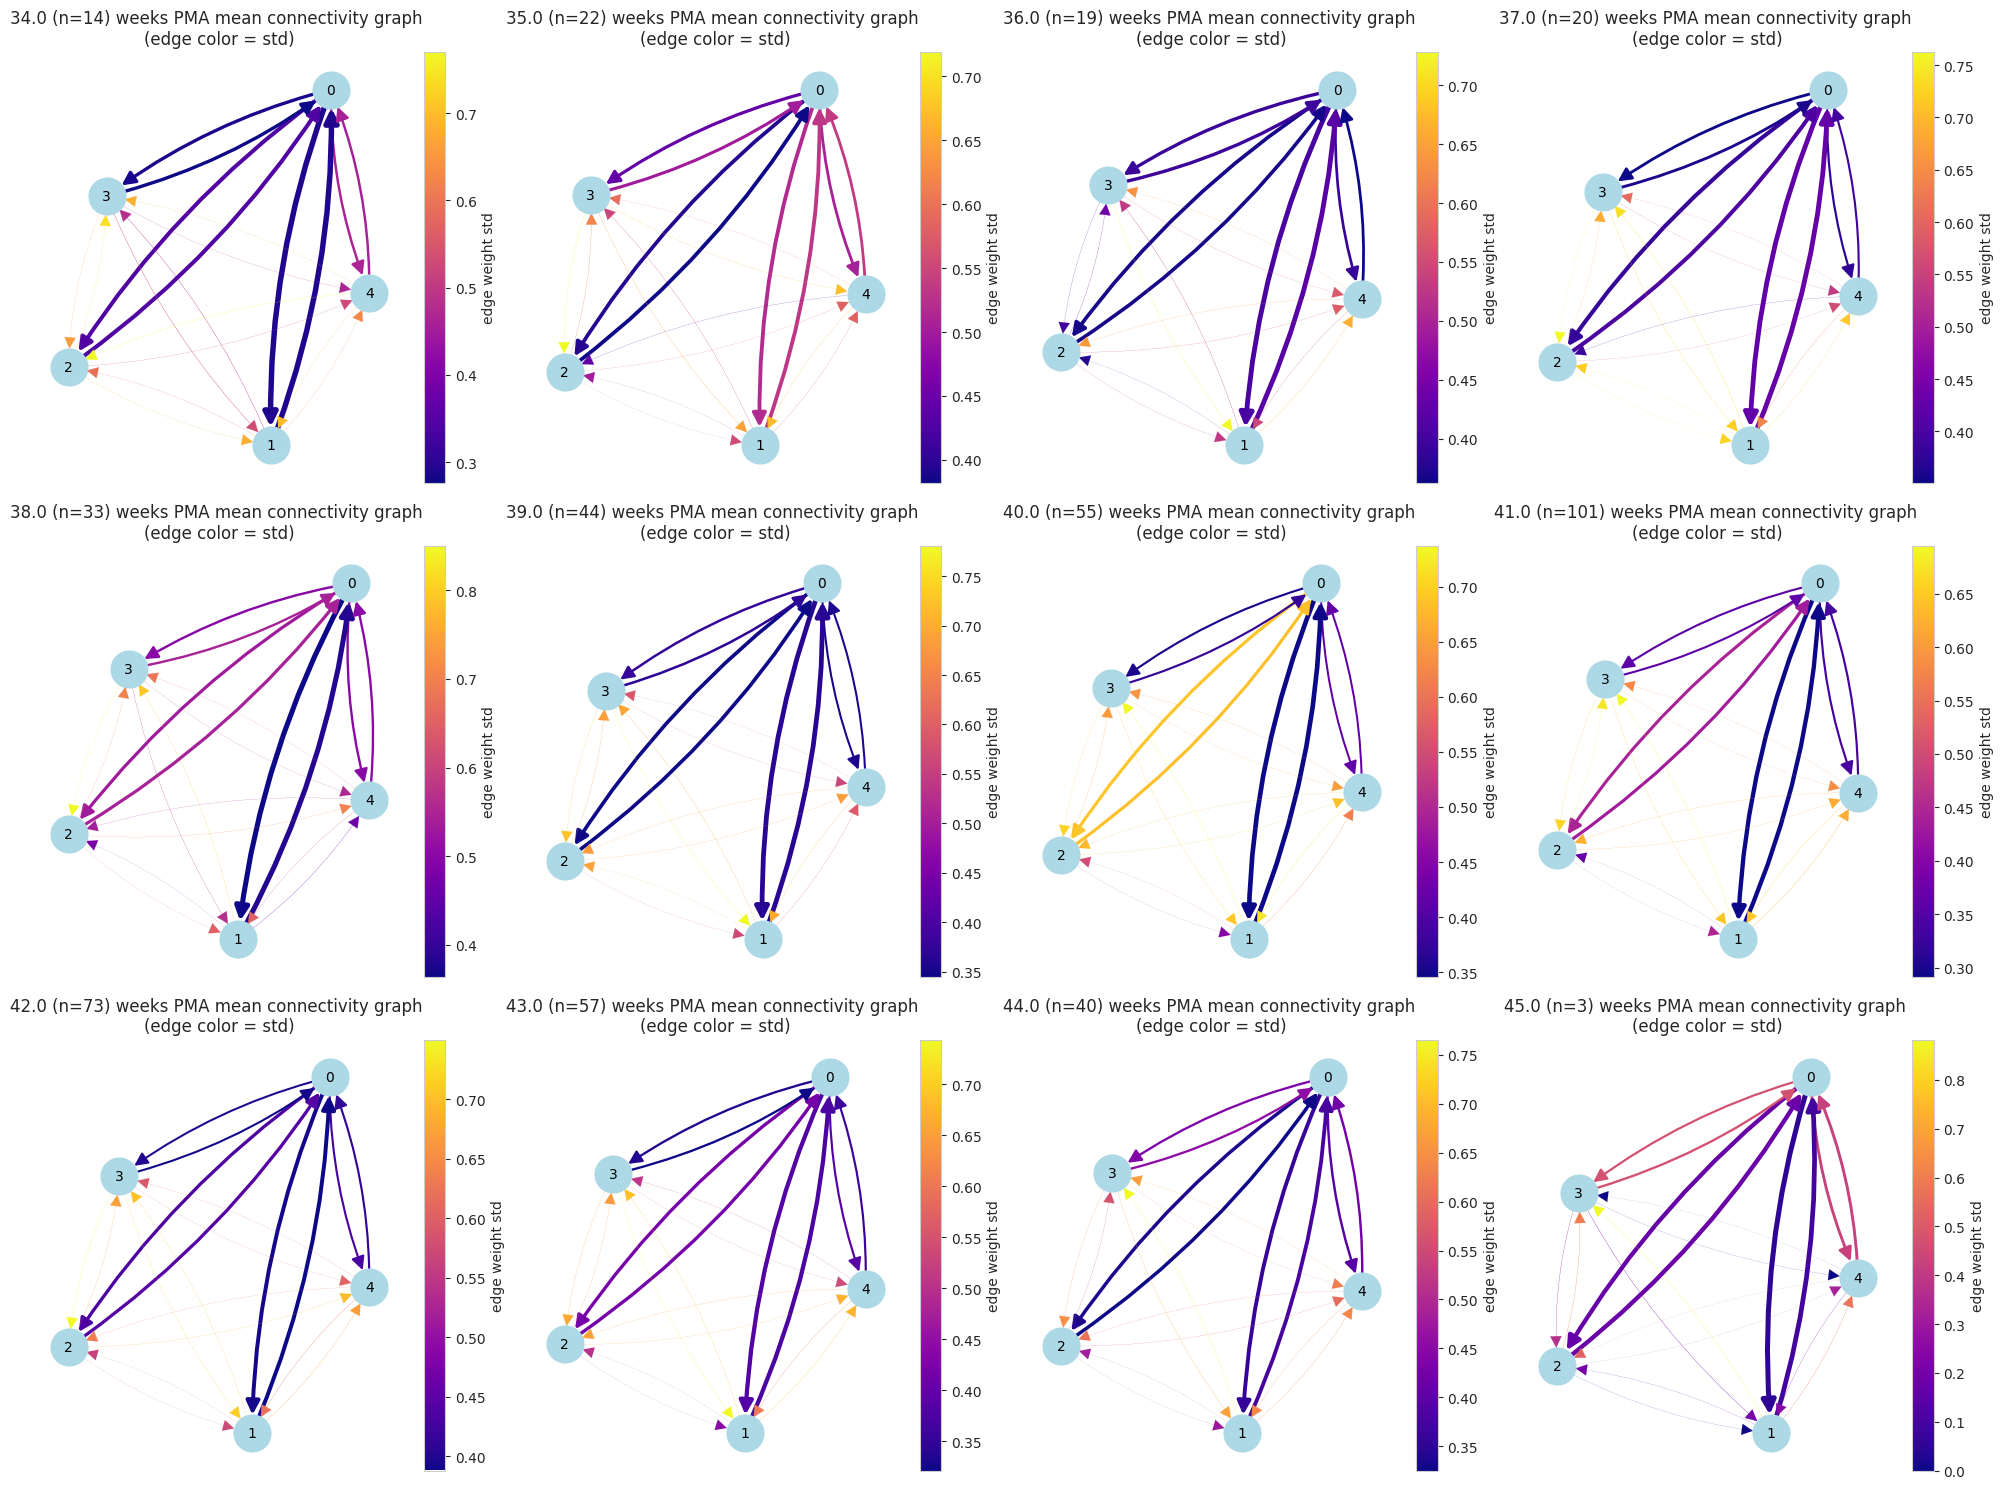

In [14]:
n_age_groups = len(age_groups)
# compute optimal n cols and rows for subplots
n_cols = int(np.ceil(np.sqrt(n_age_groups)))
n_rows = int(np.ceil(n_age_groups / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

# hide unused axes
for ax in axes[n_age_groups:]:
    ax.axis('off')


for age_group_idx, (age_group_name, age_group_df) in enumerate(age_groups):

    ax = axes[age_group_idx]

    graphs = [g for  g in age_group_df[("metrics", "nxGraph", 0)]]
    # build a di graph with thoses nodes, where edge distances are the mean of the edge distance between the nodes for each graph
    states = graphs[0].nodes()
    mean_graph = nx.DiGraph()
    mean_graph.add_nodes_from(states)

    for u in states:
        for v in states:
            if u == v:
                continue
            weights = []
            for g in graphs:
                if g.has_edge(u, v):
                    w = g[u][v]['weight']
                    weights.append(w)
            if weights:
                mean_weight = np.mean(weights)
                var_weight = np.std(weights) if len(weights) > 1 else 0.0
                mean_graph.add_edge(u, v, weight=mean_weight, std=var_weight)

    weights = [100*np.exp(-d['weight']) for (_, _, d) in mean_graph.edges(data=True)]
    stds = [d['std'] for (_, _, d) in mean_graph.edges(data=True)]

    norm = mcolors.Normalize(vmin=min(stds), vmax=max(stds))
    cmap = cm.plasma
    edge_colors = [cmap(norm(s)) for s in stds]

    pos = nx.spring_layout(mean_graph, seed=0)
    nx.draw(
        mean_graph, pos,
        ax=ax,
        with_labels=True,
        node_color='lightblue',
        node_size=700,
        width=weights,
        edge_color=edge_colors,
        font_size=10,
        arrowsize=20,
        connectionstyle='arc3,rad=0.1'
    )
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='edge weight std')
    ax.set_title(f"{age_group_name} (n={len(age_group_df)}) weeks PMA mean connectivity graph \n(edge color = std)")
plt.tight_layout()
plt.show()